<a href="https://colab.research.google.com/github/xin1118/Image-Generation-awesome/blob/main/02_train_betavae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pythae

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

**try**# https://github.com/clementchadebec/benchmark_VAE/blob/main/examples/notebooks/models_training/beta_vae_training.ipynb

# NEW TRY

In [ ]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

%load_ext autoreload
%autoreload 2


In [ ]:
mnist_trainset = datasets.MNIST(root='../../data', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 54.5MB/s]


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.61MB/s]


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 14.0MB/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.61MB/s]


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



In [ ]:
from pythae.models import BetaVAE, BetaVAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_VAE_MNIST, Decoder_ResNet_AE_MNIST

In [ ]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=10, # Change this to train the model a bit more
)


model_config = BetaVAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=16,
    beta=2.

)

model = BetaVAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_MNIST(model_config),
    decoder=Decoder_ResNet_AE_MNIST(model_config)
)

In [ ]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [ ]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
INFO:pythae.pipelines.training:Preprocessing train data...
Checking train dataset...
INFO:pythae.pipelines.training:Checking train dataset...
Preprocessing eval data...

INFO:pythae.pipelines.training:Preprocessing eval data...

Checking eval dataset...
INFO:pythae.pipelines.training:Checking eval dataset...
Using Base Trainer

INFO:pythae.pipelines.training:Using Base Trainer

Model passed sanity check !
Ready for training.

INFO:pythae.trainers.base_trainer.base_trainer:Model passed sanity check !
Ready for training.

Created my_model folder since did not exist.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model folder since did not exist.

Created my_model/BetaVAE_training_2025-02-19_03-21-02. 
Training config, checkpoints and final model will be saved here.

INFO:pythae.trainers.base_trainer.base_trainer:Created my_model/BetaVAE_training_2025-02-19_03-21-02. 
Training config, checkpoints and final model will be saved here.

Training params:

Training of epoch 1/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 1/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 30.5937
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 30.5937
Eval loss: 25.4468
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 25.4468
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 2/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 2/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 25.0821
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 25.0821
Eval loss: 24.4419
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 24.4419
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 3/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 3/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 24.5069
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 24.5069
Eval loss: 24.0576
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 24.0576
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 4/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 4/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 24.2879
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 24.2879
Eval loss: 23.9405
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 23.9405
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 5/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 5/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 24.1306
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 24.1306
Eval loss: 23.9763
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 23.9763
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 6/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 6/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 24.0693
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 24.0693
Eval loss: 23.7451
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 23.7451
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 7/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 7/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 23.9753
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 23.9753
Eval loss: 23.715
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 23.715
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 8/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 8/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 23.9267
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 23.9267
Eval loss: 23.6632
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 23.6632
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 9/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 9/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 23.8292
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 23.8292
Eval loss: 23.5486
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 23.5486
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------


Training of epoch 10/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 10/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Train loss: 23.8011
INFO:pythae.trainers.base_trainer.base_trainer:Train loss: 23.8011
Eval loss: 23.5763
INFO:pythae.trainers.base_trainer.base_trainer:Eval loss: 23.5763
--------------------------------------------------------------------------
INFO:pythae.trainers.base_trainer.base_trainer:--------------------------------------------------------------------------
Training ended!
INFO:pythae.trainers.base_trainer.base_trainer:Training ended!
Saved final model in my_model/BetaVAE_training_2025-02-19_03-21-02/final_model
INFO:pythae.trainers.base_trainer.base_trainer:Saved final model in my_model/BetaVAE_training_2025-02-19_03-21-02/final_model


In [ ]:
import os
from pythae.models import AutoModel

In [ ]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

/usr/local/lib/python3.11/dist-packages/pythae/models/base/base_model.py:358: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_weights = torch.load(path_to_model_weights,

In [ ]:
from pythae.samplers import NormalSampler

In [ ]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [ ]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [ ]:
import matplotlib.pyplot as plt

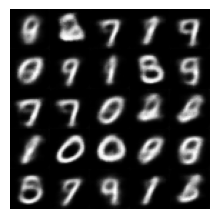

In [ ]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(2, 2))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

In [ ]:
# set up gmm sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

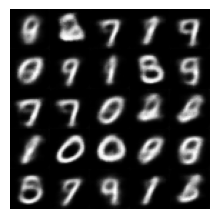

In [ ]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(2, 2))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [ ]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

In [ ]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_VAE_MNIST, Decoder_ResNet_AE_MNIST
from pythae.pipelines import TrainingPipeline
from pythae.data.datasets import Mnist
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义数据预处理
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # 确保图像尺寸为 28x28，与 MNIST 一致
    transforms.Grayscale(),       # 确保图像为灰度图像
    transforms.ToTensor(),        # 转换为 PyTorch 张量
    transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
])

# 加载自定义数据集（假设你有一个自己的图像数据集）
train_dataset = datasets.ImageFolder(root='path/to/your/train/data', transform=transform)
eval_dataset = datasets.ImageFolder(root='path/to/your/eval/data', transform=transform)

# 包装为 PythAE 兼容的数据集
train_dataset = Mnist(train_dataset)
eval_dataset = Mnist(eval_dataset)

# 定义 VAE 配置
model_config = VAEConfig(
    input_dim=(1, 28, 28),  # 输入数据的维度（1 表示灰度图像）
    latent_dim=10          # 潜在空间的维度
)

# 初始化 VAE 模型
model = VAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_MNIST(model_config),
    decoder=Decoder_ResNet_AE_MNIST(model_config)
)

# 定义训练配置
training_config = BaseTrainerConfig(
    output_dir='my_model',  # 训练结果保存路径
    num_epochs=50,          # 训练轮数
    learning_rate=1e-3,     # 学习率
)

# 初始化 TrainingPipeline
pipeline = TrainingPipeline(
    model=model,
    training_config=training_config
)

# 启动训练
pipeline(train_data=train_dataset, eval_data=eval_dataset)